# 911 Calls Capstone Project 

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

In [2]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [5]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
# Check for missing values
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

What are the top 5 zipcodes for 911 calls? 

In [8]:
df['zip'].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

What are the top 5 townships (twp) for 911 calls? 

In [9]:
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

Take a look at the 'title' column, how many unique title codes are there? 

In [10]:
df['title'].nunique()

110

## Creating new features

In the titles column there are "reason s/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "reason " that contains this string value.

For example, if the title column value is EMS: BACK PAINS/INJURY , the reason  column value would be EMS. 

In [11]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


What is the most common reason  for a 911 call based off of this new column? 

In [12]:
df['reason'].value_counts()

reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

Now use seaborn to create a countplot of 911 calls by reason . 

C:\Users\hamin\AppData\Local\Temp\ipykernel_35728\3224935473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reason', data=df, palette='viridis')


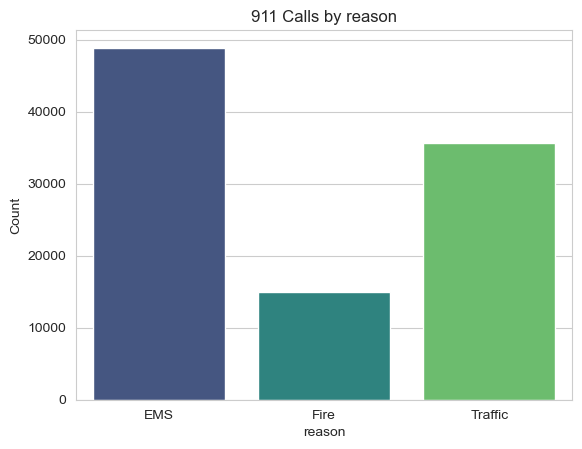

In [13]:
# Plotting the count of 911 calls by reason
sns.countplot(x='reason', data=df, palette='viridis')
plt.title('911 Calls by reason')
plt.xlabel('reason')
plt.ylabel('Count')
plt.show()

You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. 

In [14]:
# Convert timeStamp to a datetime object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Confirm the conversion
df['timeStamp'].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

You can now grab specific attributes from a Datetime object by calling them. For example:

    time = df['timeStamp'].iloc[0]
    time.hour

You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, month, and day_of_week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [15]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['day_of_week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['day_of_week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: day_of_week, Length: 99492, dtype: int64

Notice how the day_of_week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: 

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
df['day_of_week'] = df['day_of_week'].map(dmap)

In [18]:
# Display the first few rows of the updated DataFrame
df[['timeStamp', 'hour', 'month', 'day_of_week', 'reason']].head()

,timeStamp,hour,month,day_of_week,reason
0,2015-12-10 17:40:00,17,12,Thu,EMS
1,2015-12-10 17:40:00,17,12,Thu,EMS
2,2015-12-10 17:40:00,17,12,Thu,Fire
3,2015-12-10 17:40:01,17,12,Thu,EMS
4,2015-12-10 17:40:01,17,12,Thu,EMS


Now use seaborn to create a countplot of the day_of_week column with the hue based off of the reason  column. 

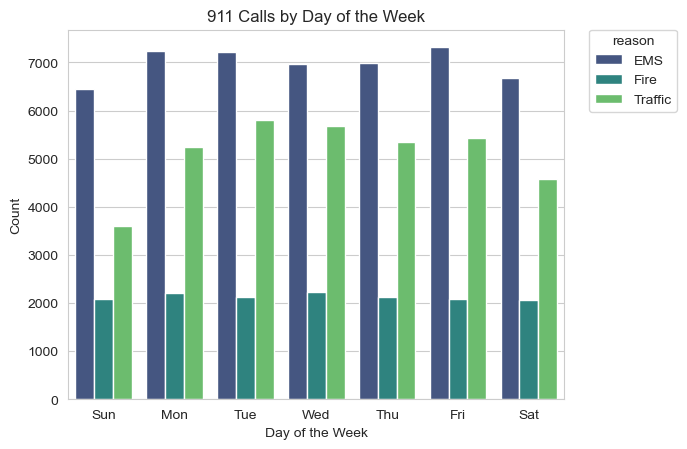

In [19]:
# Define the order for days of the week
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Set 'day_of_week' as a categorical type with the specified order
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

# Create the count plot with the specified day order
sns.countplot(x='day_of_week', data=df, hue='reason', palette='viridis')
plt.title('911 Calls by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='reason', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Now do the same for month:

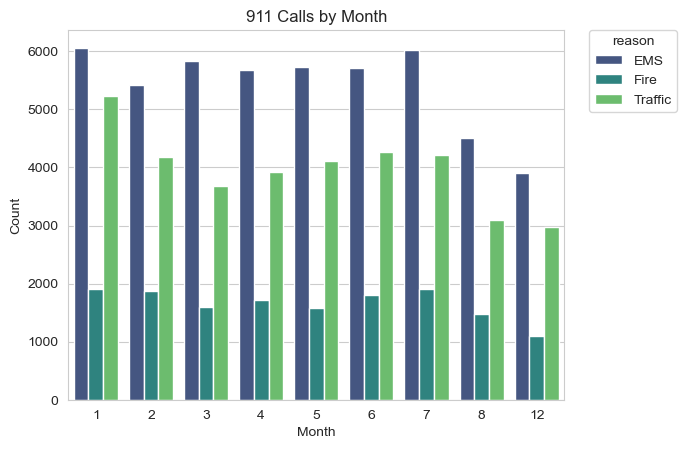

In [20]:
# Count plot for 911 calls by month
sns.countplot(x='month', data=df, hue='reason', palette='viridis')
plt.title('911 Calls by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='reason', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The plot is missing some months! 9,10, and 11 are not there.

You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...

Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. 

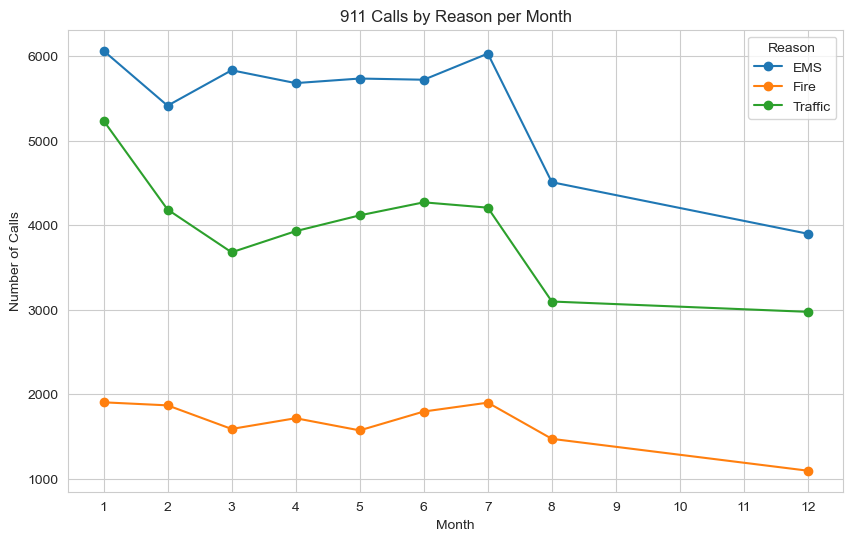

In [21]:
# Group by 'month' and 'reason' to get counts for each reason type per month
monthly_calls = df.groupby(['month', 'reason']).size().unstack()

# Plotting the data
plt.figure(figsize=(10, 6))
monthly_calls.plot(kind='line', marker='o', ax=plt.gca())
plt.title('911 Calls by Reason per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(range(1, 13))  # Ensure x-axis represents months from 1 to 12
plt.legend(title='Reason')
plt.grid(True)
plt.show()

Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. 

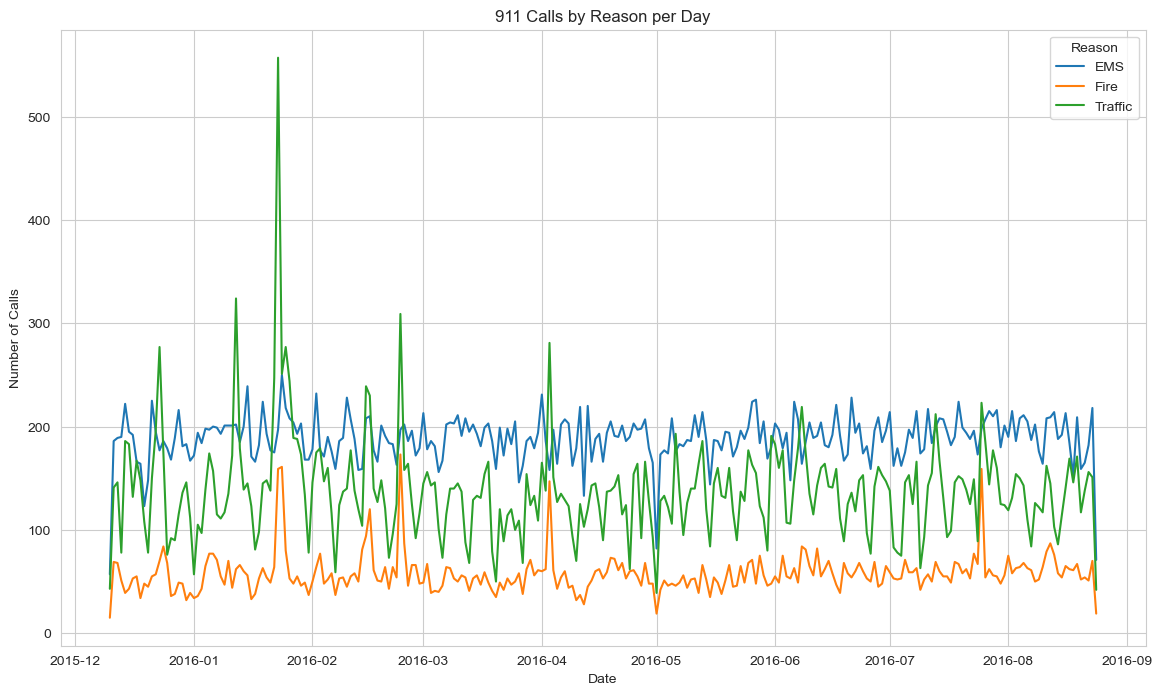

In [22]:
import matplotlib.pyplot as plt

# Creating a 'date' column by extracting the date part from 'timeStamp'
df['date'] = df['timeStamp'].dt.date

# Grouping by 'date' and 'reason' to get daily counts for each reason type
daily_calls = df.groupby(['date', 'reason']).size().unstack()

# Plotting the data
plt.figure(figsize=(14, 8))
daily_calls.plot(kind='line', marker='', ax=plt.gca())
plt.title('911 Calls by Reason per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend(title='Reason')
plt.grid(True)
plt.show()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

C:\Users\hamin\AppData\Local\Temp\ipykernel_35728\3409139245.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_hour = df.groupby(by=['day_of_week', 'hour']).count()['reason'].unstack()


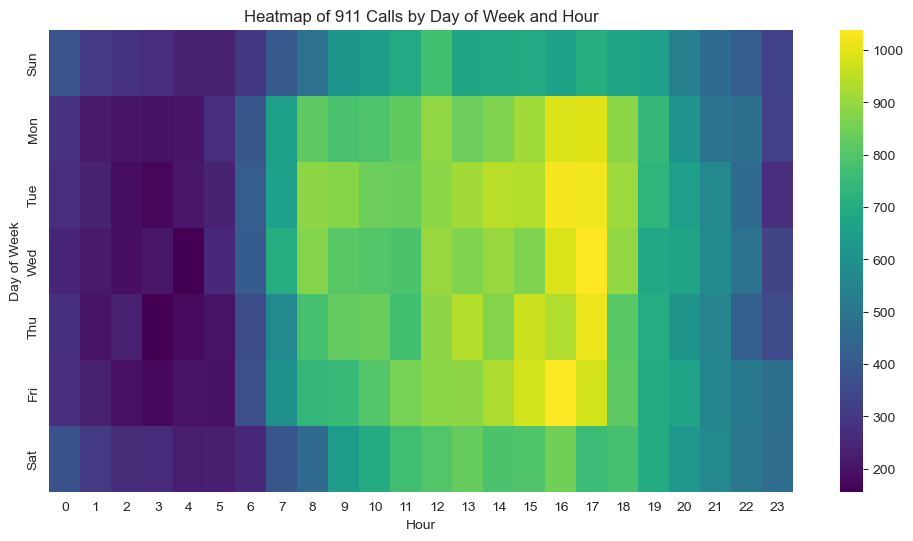

In [24]:
# Creating a heatmap for hour and day of week
day_hour = df.groupby(by=['day_of_week', 'hour']).count()['reason'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(day_hour, cmap='viridis')
plt.title('Heatmap of 911 Calls by Day of Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()

C:\Users\hamin\AppData\Local\Temp\ipykernel_35728\1596770717.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_hour = df.groupby(by=['day_of_week', 'month']).count()['reason'].unstack()


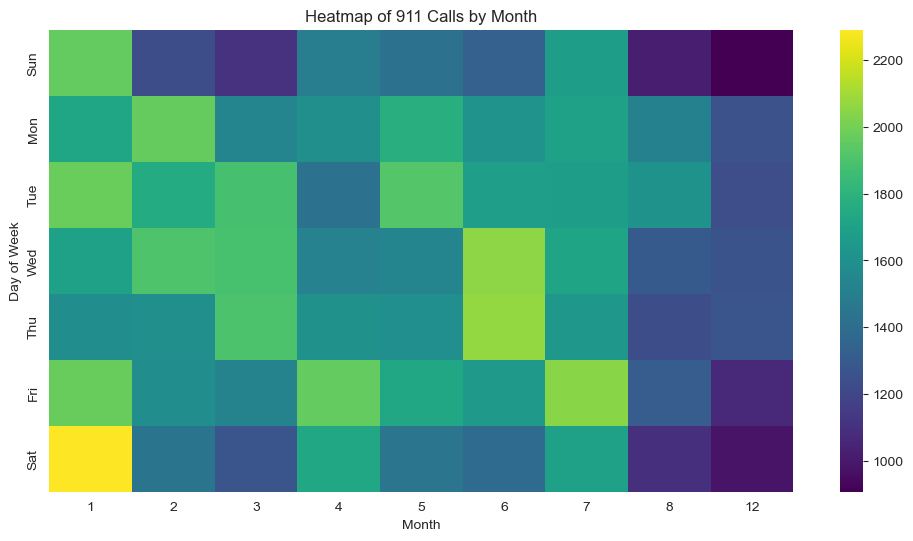

In [25]:
# Creating a heatmap for month and day of week
day_hour = df.groupby(by=['day_of_week', 'month']).count()['reason'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(day_hour, cmap='viridis')
plt.title('Heatmap of 911 Calls by Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.show()

** Now repeat these same plots and operations, for a DataFrame that shows the month as the column. **

In [31]:
dayMonth = df.groupby(by=['day_of_week','month']).count()['reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='Day of Week'>

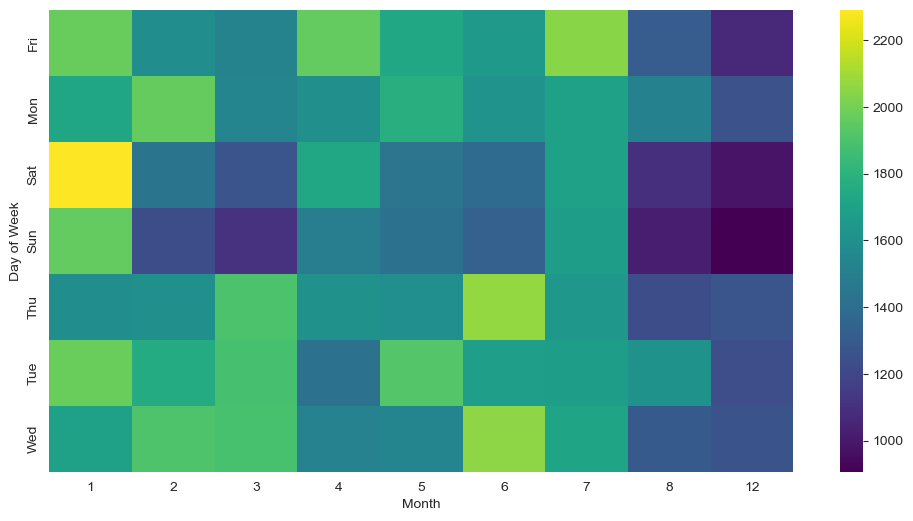

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

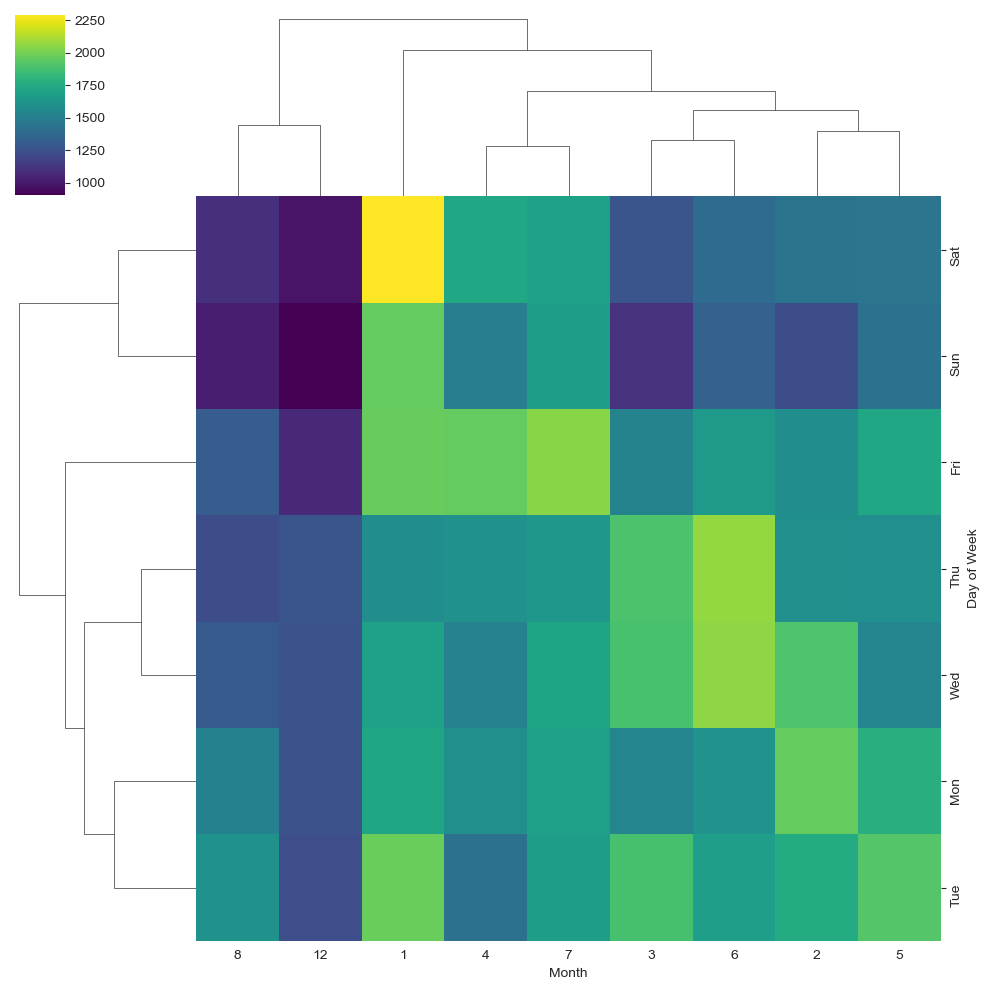

In [33]:
sns.clustermap(dayMonth,cmap='viridis')